<a href="https://colab.research.google.com/github/fdluiuc/lecture-notebooks/blob/master/00-embedding-an-image-in-a-google-colab-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Images in a Google Colab Notebook

There are **three** approaches to embedding an image in Google Colab.

1. Reference a publicly shared image file link with markdown.
1. Embed the image using a **text cell**'s Image upload feature.
1. Directly embed image results using a code cell

The first approach isn't ideal as the image must first be uploaded to Google Drive and a sharable URL to the image must be obtained by navigating context menus. 

The second approach also isn't ideal, but is significantly better at avoiding content going missing. In the markdown embedding approach, the image data will be directly embedded in the text call. Unfortunately, some images are large in size, which will cause the cell to overflow with text making it difficult to include commentary. The quick work around is to create a separate markdown cell for each image uploaded. 

Finally, the third approach using `IPython` yields better results in practice as exported Google Colab notebooks will retain their images. Unlike the second approach, the image data embedding is done progamatically instead of with a file selector. 

# Embedding by Markdown

The first direct embeding approach is to use the Google Colab Markdown editor to insert an image. We recommend creating a separate markdown cell to embed the image to avoid having the encoded image data mixing with text information. In fact, that is exactly how we show the image embedding below.

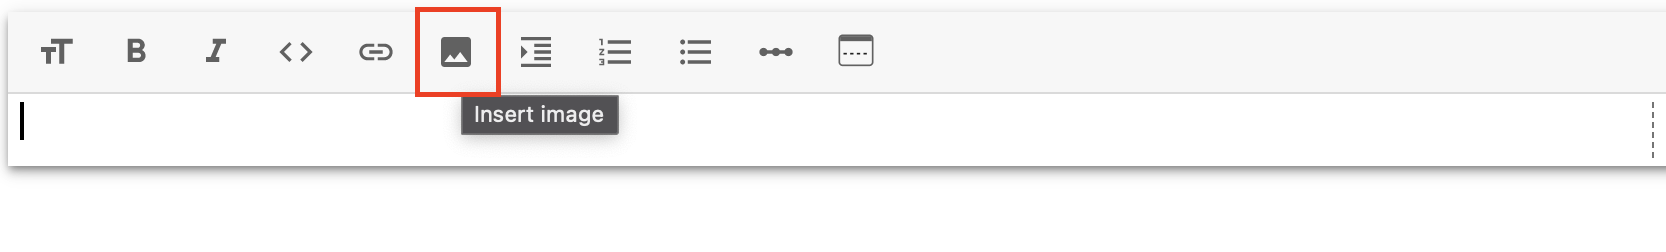

# Embedding by IPython Display

In this section, we walk through embedding an image into a code cell using `IPython`. 

## Setup

At the top of every notebook, place the following code chunk to setup the appropriate drive import statement.

In [ ]:
# Step 1a: Load functions for mounting and viewing images 
from IPython.display import Image

try:
  from google.colab import drive
  from google.colab import files
  on_colab = True
except:
  on_colab = False


# Step 1b: Mount Device Drive
# Mounting the device will require following instructions to enter a
if on_colab:
  drive.mount('/content/drive')
else:
  print("Notebook is not being run on Google Colab!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set Project Directory

By default, `files.upload()` will place any uploaded files into the active working directory. Unfortunately, Google Colab's working directory is the `/content` or root directory that is **temporary** and **separate** from Google Drive. To ensure files are saved on the drive in addition to being embedded in the notebook, make sure to change the working directory into where the file was mounted. 

We recommend creating a new folder for each project and setting the working directory to the folder.

In [ ]:
# Make a directory for images
!mkdir -p /content/drive/My\ Drive/imgs

# Change into My Drive with % for persistency
%cd /content/drive/My\ Drive/imgs 

## Embedding

For each image you wish to embed, the following two code chunks are required.

In [ ]:
# Step 2: Upload an image file 
uploaded = files.upload()

Saving colab-logo.png to colab-logo (2).png


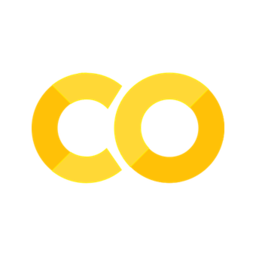

In [ ]:
# Step 3: Display the embedded image in the notebook.
Image('colab-logo.png', width=100)

# Syncing
At the end of every session, synchronize the changes back to Google Drive by using `drive.flush_and_unmount()`. If the changes are not sync'd.

In [ ]:
# Step 4: Sync changes to Drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.
